# Introduction
## EDA: The "Censored Demand" Trap
**Objective:** Visualize the discrepancy between *Sales* (what we recorded) and *True Demand* (what customers wanted).

In retail, **Sales $\neq$ Demand**. When inventory hits zero, sales drop to zero, but demand continues. This is called **Censored Demand**. If we train a model on raw sales data, it will learn to under-predict demand during peak periods, leading to a "Death Spiral" of shrinking inventory.

**Key Questions:**
1. How often do stockouts occur?
2. What is the "Invisible Gap" between Sales and True Demand?

### Step 1 Load Data and Libraries:
Load the raw synthetic data and convert dates to the correct format.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/raw/synthetic_sales.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"Data Shape: {df.shape}")
df.head()

Data Shape: (18250, 7)


,date,product_id,inventory_morning,qty_sold,true_demand_hidden,is_stockout,store_traffic
0,2023-01-01,1,33,33,33,0,571
1,2023-01-02,1,19,19,20,1,966
2,2023-01-03,1,18,18,25,1,872
3,2023-01-04,1,34,33,33,0,649
4,2023-01-05,1,23,23,26,1,913


### Step 2 Visualize the Stockout Trap:
We will zoom in on a single product to see the "Capping" effect. 
Observe how `Qty Sold` (Blue) tracks `True Demand` (Green) **until** it hits the `Inventory Limit` (Red).

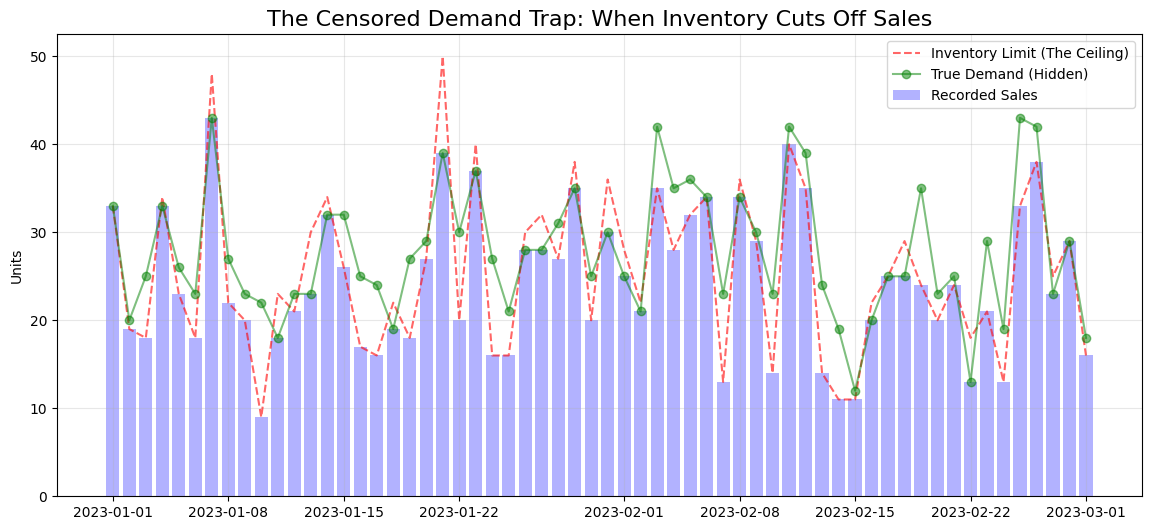

In [2]:
# Filter for one product (e.g., Product 1)
product_df = df[df['product_id'] == 1].iloc[0:60] # First 60 days

plt.figure(figsize=(14, 6))

# Plot Inventory (The Ceiling)
plt.plot(product_df['date'], product_df['inventory_morning'], 
         color='red', linestyle='--', label='Inventory Limit (The Ceiling)', alpha=0.6)

# Plot True Demand (The Hidden Truth)
plt.plot(product_df['date'], product_df['true_demand_hidden'], 
         color='green', marker='o', label='True Demand (Hidden)', alpha=0.5)

# Plot Actual Sales (The Observed Reality)
plt.bar(product_df['date'], product_df['qty_sold'], 
        color='blue', alpha=0.3, label='Recorded Sales')

plt.title("The Censored Demand Trap: When Inventory Cuts Off Sales", fontsize=16)
plt.ylabel("Units")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Conclusion
The chart above clearly demonstrates the problem:
* On days where the **Green Line** (Demand) is higher than the **Red Line** (Inventory), our **Blue Bars** (Sales) are "clipped."
* A standard model trained only on the Blue Bars will think demand is lower than it actually is.
* **Action:** In the next notebook, we will use `uncensor.py` to reconstruct the Green Line.